In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
data = tf.keras.datasets.mnist # Hand Written Digits Data
(x_train,y_train) , (x_test,y_test) = data.load_data() # Split data
x_train.shape

(60000, 28, 28)

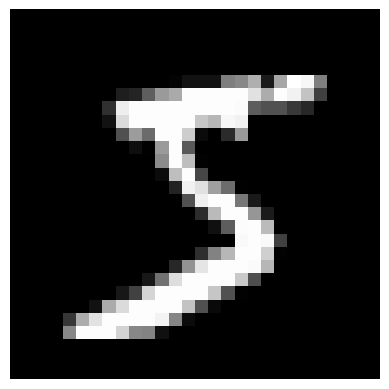

5


In [4]:
image = x_train[0]  # image in first index

# Show image
plt.imshow(image, cmap='gray')  # 'gray' for black-white image
plt.axis('off')  # Hiding axes
plt.show()
print(y_train[0]) 

In [5]:
# We normalized the data to the range of 0 to 1.
x_train = tf.keras.utils.normalize(x_train,axis=1) 
x_test = tf.keras.utils.normalize(x_test,axis=1) 

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense


model = Sequential([
    Flatten(input_shape=(28,28)), # input layer , 28x28 image converted to 1D 
    Dense(128,activation='relu'), #  layer has 128 neuron
    Dense(128,activation='relu'),
    Dense(10,activation='softmax') # output layer
])


c:\Users\Furkan-PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8640 - loss: 0.4675
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9660 - loss: 0.1092
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9785 - loss: 0.0703
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9843 - loss: 0.0507
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9865 - loss: 0.0403
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9907 - loss: 0.0285
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9932 - loss: 0.0210
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9943 - loss: 0.0172
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9946 - loss: 0.0163
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9957 - loss: 0.0122


In [9]:
loss , accuracy = model.evaluate(x_test,y_test)
print(f"Loss:{loss}\nAccuracy:{accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9728 - loss: 0.1135
Loss:0.09963838756084442
Accuracy:0.9768000245094299


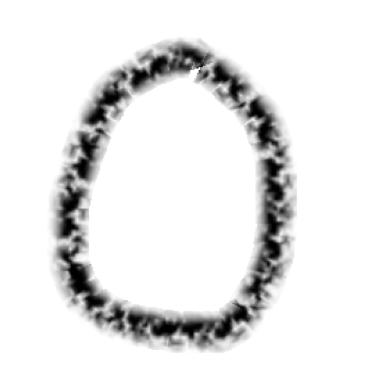

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted digit: 0
Confidence: 100.00%
Full probabilities: [9.9999177e-01 3.7151604e-10 8.2606066e-06 3.8231058e-09 2.2190591e-17
 7.1585809e-13 1.5539042e-11 4.4836554e-14 4.5641020e-16 7.1325879e-10]



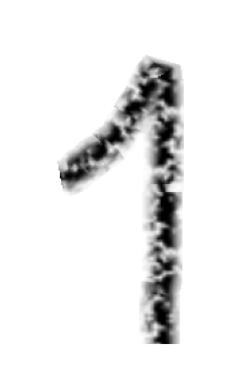

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted digit: 7
Confidence: 99.45%
Full probabilities: [1.7997831e-13 2.8446405e-07 7.8902126e-04 4.3525300e-03 8.4678558e-12
 1.7347521e-04 2.8146109e-15 9.9454039e-01 1.4303990e-04 1.1855167e-06]



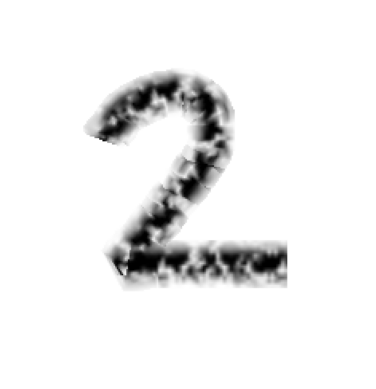

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted digit: 7
Confidence: 56.19%
Full probabilities: [5.2122024e-15 2.6257865e-09 4.3142876e-01 6.7110709e-03 2.5196911e-12
 1.3362677e-11 5.7761367e-17 5.6186014e-01 1.0744368e-10 4.2924181e-14]



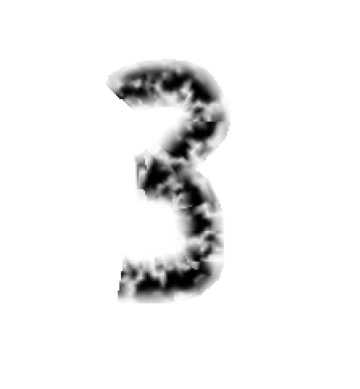

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted digit: 3
Confidence: 100.00%
Full probabilities: [2.2602259e-28 3.6824781e-07 2.1378769e-11 9.9999964e-01 1.4968635e-18
 3.5774279e-20 9.9282593e-34 1.4685544e-12 3.7838860e-18 1.4220277e-17]



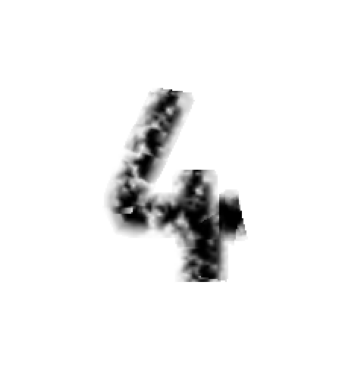

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted digit: 4
Confidence: 100.00%
Full probabilities: [1.1005754e-37 2.8222692e-21 2.0142522e-24 3.9938600e-30 1.0000000e+00
 1.5797913e-26 2.9949116e-18 2.2714651e-19 1.2679647e-35 1.1951354e-18]



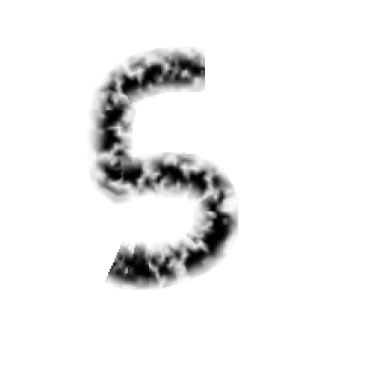

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted digit: 5
Confidence: 93.65%
Full probabilities: [1.9078491e-12 4.6889664e-10 1.8801036e-05 6.2144507e-02 5.3527682e-08
 9.3652362e-01 3.7822204e-10 1.1023132e-03 1.9635700e-04 1.4280448e-05]



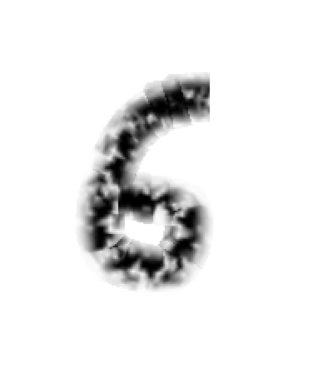

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted digit: 6
Confidence: 99.99%
Full probabilities: [2.9631882e-13 1.0663728e-12 9.2021475e-09 8.6346547e-15 1.0928629e-05
 7.2228206e-05 9.9991512e-01 1.2031828e-14 2.3673877e-07 1.3831884e-06]



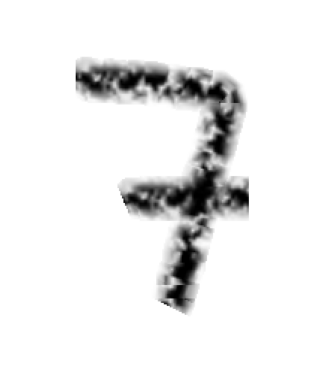

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted digit: 3
Confidence: 72.78%
Full probabilities: [9.78124001e-16 1.53542715e-06 1.82512146e-03 7.27784455e-01
 3.17030889e-03 9.84194316e-17 5.69078950e-14 2.67218500e-01
 7.47197859e-09 1.29825235e-08]



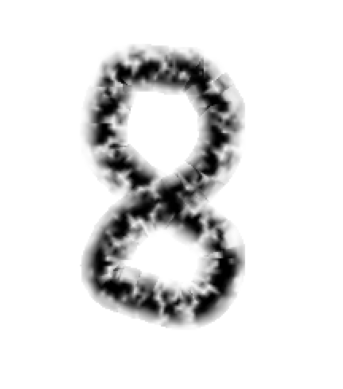

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted digit: 8
Confidence: 100.00%
Full probabilities: [3.6647256e-21 2.6130364e-19 3.3161362e-07 6.3917537e-06 3.0005737e-11
 6.6450019e-14 1.6348543e-18 1.4896794e-14 9.9999321e-01 9.1434254e-18]



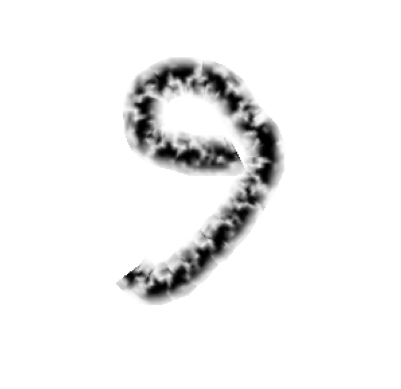

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted digit: 9
Confidence: 87.10%
Full probabilities: [1.6071362e-09 4.2004222e-06 5.0962559e-04 1.0548263e-01 2.2166795e-08
 6.6911281e-07 3.9172004e-15 1.0120335e-02 1.2846055e-02 8.7103653e-01]



In [25]:
image_number = 0
path = "digits/digit"

while os.path.isfile(f"{path}{image_number}.png"):
    try:
        current_path = f"{path}{image_number}.png"
        
        # 1. Read original image
        image = cv2.imread(current_path, cv2.IMREAD_GRAYSCALE)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.show()
        
        # 2. Simple thresholding
        _, image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    
        # 3. Ensure digits are black on white background
        if np.mean(image) > 127:  # if background is light
            image = cv2.bitwise_not(image)
        
        # 4. Normalize to [0, 1]
        image = image.astype('float32') / 255.0
        
        # 5. Resize to 28x28
        image = cv2.resize(image, (28, 28))
        
        # Reshape for model input
        model_input = image.reshape(1, 28, 28, 1)
        
        # Make prediction
        prediction = model.predict(model_input)
        predicted_digit = np.argmax(prediction)
        confidence = prediction[0][predicted_digit] * 100
        
        print(f"Predicted digit: {predicted_digit}")
        print(f"Confidence: {confidence:.2f}%")
        print(f"Full probabilities: {prediction[0]}\n")
        
    except Exception as e:
        print(f"Error processing image {current_path}: {e}")
    finally:
        image_number += 1
        

In [11]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D

model2 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),  # 2D giriş (örneğin, 28x28 tek kanallı görüntü)
    MaxPooling2D(pool_size=(2,2)),  # Havuzlama katmanı
    Flatten(),  # 2D -> 1D dönüşümü
    Dense(128, activation='relu'),  # Tam bağlantılı katman
    Dense(10, activation='softmax')  # Çıkış katmanı (10 sınıflı)
])

c:\Users\Furkan-PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
model2.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8884 - loss: 0.3809
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9798 - loss: 0.0688
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9858 - loss: 0.0446
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9906 - loss: 0.0292
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9943 - loss: 0.0191
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9956 - loss: 0.0139
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9967 - loss: 0.0108
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9977 - loss: 0.0070
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9982 - loss: 0.0064
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9980 - loss: 0.0058


In [ ]:
loss , accuracy = model.evaluate(x_test,y_test)
print(f"Loss:{loss}\nAccuracy:{accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - accuracy: 0.9728 - loss: 0.1135
Loss:0.09963838756084442
Accuracy:0.9768000245094299


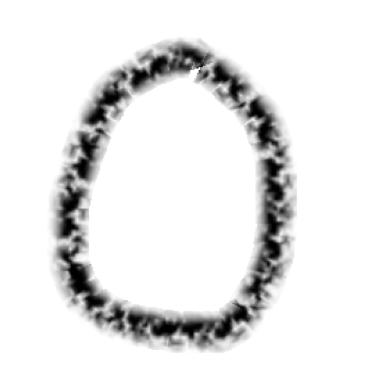

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted digit: 0
Confidence: 100.00%
Full probabilities: [9.9999177e-01 3.7151604e-10 8.2606066e-06 3.8231058e-09 2.2190591e-17
 7.1585809e-13 1.5539042e-11 4.4836554e-14 4.5641020e-16 7.1325879e-10]



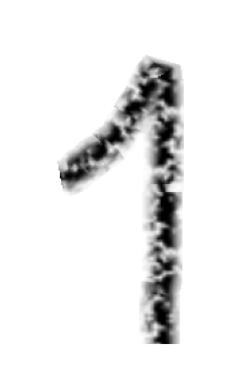

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted digit: 7
Confidence: 99.45%
Full probabilities: [1.7997831e-13 2.8446405e-07 7.8902126e-04 4.3525300e-03 8.4678558e-12
 1.7347521e-04 2.8146109e-15 9.9454039e-01 1.4303990e-04 1.1855167e-06]



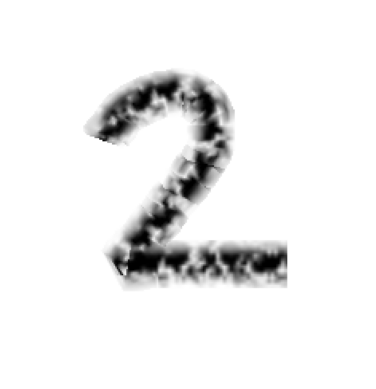

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted digit: 7
Confidence: 56.19%
Full probabilities: [5.2122024e-15 2.6257865e-09 4.3142876e-01 6.7110709e-03 2.5196911e-12
 1.3362677e-11 5.7761367e-17 5.6186014e-01 1.0744368e-10 4.2924181e-14]



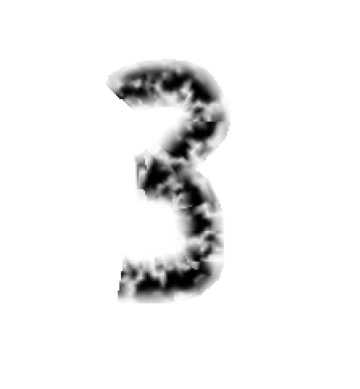

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted digit: 3
Confidence: 100.00%
Full probabilities: [2.2602259e-28 3.6824781e-07 2.1378769e-11 9.9999964e-01 1.4968635e-18
 3.5774279e-20 9.9282593e-34 1.4685544e-12 3.7838860e-18 1.4220277e-17]



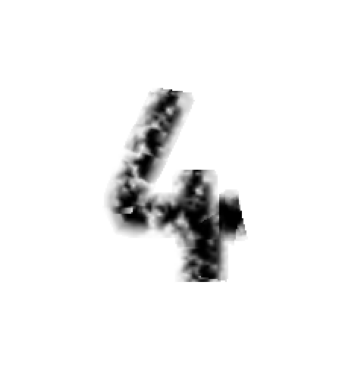

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted digit: 4
Confidence: 100.00%
Full probabilities: [1.1005754e-37 2.8222692e-21 2.0142522e-24 3.9938600e-30 1.0000000e+00
 1.5797913e-26 2.9949116e-18 2.2714651e-19 1.2679647e-35 1.1951354e-18]



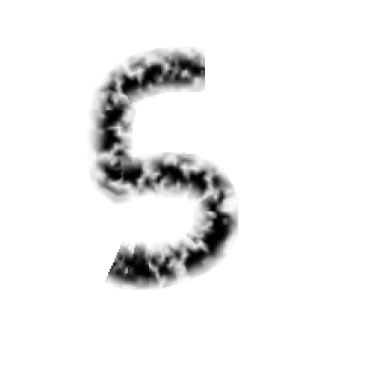

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted digit: 5
Confidence: 93.65%
Full probabilities: [1.9078491e-12 4.6889664e-10 1.8801036e-05 6.2144507e-02 5.3527682e-08
 9.3652362e-01 3.7822204e-10 1.1023132e-03 1.9635700e-04 1.4280448e-05]



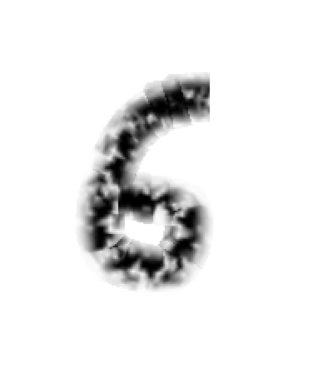

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted digit: 6
Confidence: 99.99%
Full probabilities: [2.9631882e-13 1.0663728e-12 9.2021475e-09 8.6346547e-15 1.0928629e-05
 7.2228206e-05 9.9991512e-01 1.2031828e-14 2.3673877e-07 1.3831884e-06]



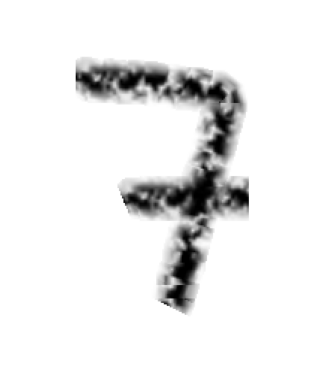

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted digit: 3
Confidence: 72.78%
Full probabilities: [9.78124001e-16 1.53542715e-06 1.82512146e-03 7.27784455e-01
 3.17030889e-03 9.84194316e-17 5.69078950e-14 2.67218500e-01
 7.47197859e-09 1.29825235e-08]



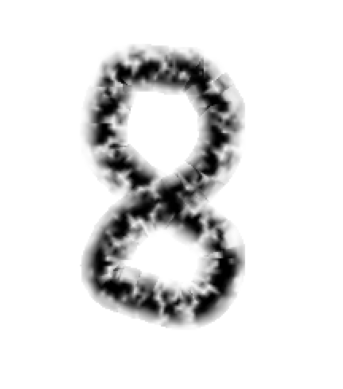

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted digit: 8
Confidence: 100.00%
Full probabilities: [3.6647256e-21 2.6130364e-19 3.3161362e-07 6.3917537e-06 3.0005737e-11
 6.6450019e-14 1.6348543e-18 1.4896794e-14 9.9999321e-01 9.1434254e-18]



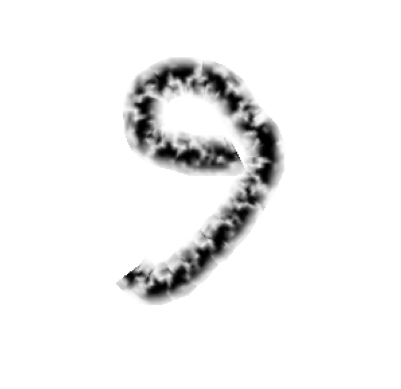

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted digit: 9
Confidence: 87.10%
Full probabilities: [1.6071362e-09 4.2004222e-06 5.0962559e-04 1.0548263e-01 2.2166795e-08
 6.6911281e-07 3.9172004e-15 1.0120335e-02 1.2846055e-02 8.7103653e-01]



In [24]:
image_number = 0
path = "digits/digit"

while os.path.isfile(f"{path}{image_number}.png"):
    try:
        current_path = f"{path}{image_number}.png"
        
        # 1. Read original image
        image = cv2.imread(current_path, cv2.IMREAD_GRAYSCALE)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.show()
        
        # 2. Simple thresholding
        _, image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    
        # 3. Ensure digits are black on white background
        if np.mean(image) > 127:  # if background is light
            image = cv2.bitwise_not(image)
        
        # 4. Normalize to [0, 1]
        image = image.astype('float32') / 255.0
        
        # 5. Resize to 28x28
        image = cv2.resize(image, (28, 28))
        
        # Reshape for model input
        model_input = image.reshape(1, 28, 28, 1)
        
        # Make prediction
        prediction = model.predict(model_input)
        predicted_digit = np.argmax(prediction)
        confidence = prediction[0][predicted_digit] * 100
        
        print(f"Predicted digit: {predicted_digit}")
        print(f"Confidence: {confidence:.2f}%")
        print(f"Full probabilities: {prediction[0]}\n")
        
    except Exception as e:
        print(f"Error processing image {current_path}: {e}")
    finally:
        image_number += 1
        